In [20]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from datasets import load_dataset

Using the latest cached version of the dataset since jahjinx/IMDb_movie_reviews couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Legion\.cache\huggingface\datasets\jahjinx___im_db_movie_reviews\default\0.0.0\ef30f6a046230c843d79822b928267efd9453d5b (last modified on Tue Nov  5 00:18:40 2024).


Epoch 1/10
563/563 [==============================] - 183s 323ms/step - loss: 0.7871 - accuracy: 0.5248 - val_loss: 0.6689 - val_accuracy: 0.5602
Epoch 2/10
563/563 [==============================] - 179s 318ms/step - loss: 0.7015 - accuracy: 0.5884 - val_loss: 0.6344 - val_accuracy: 0.6127
Epoch 3/10
563/563 [==============================] - 181s 322ms/step - loss: 0.7412 - accuracy: 0.5974 - val_loss: 0.6538 - val_accuracy: 0.5863
Epoch 4/10
563/563 [==============================] - 181s 322ms/step - loss: 0.7535 - accuracy: 0.5930 - val_loss: 0.7343 - val_accuracy: 0.5698
Epoch 5/10
563/563 [==============================] - 182s 323ms/step - loss: 0.7328 - accuracy: 0.6037 - val_loss: 0.6386 - val_accuracy: 0.5853
Epoch 6/10
563/563 [==============================] - 179s 319ms/step - loss: 0.7485 - accuracy: 0.6132 - val_loss: 0.7300 - val_accuracy: 0.5575
Epoch 7/10
563/563 [==============================] - 180s 320ms/step - loss: 1.1258 - accuracy: 0.5704 - val_loss: 0.8633 -

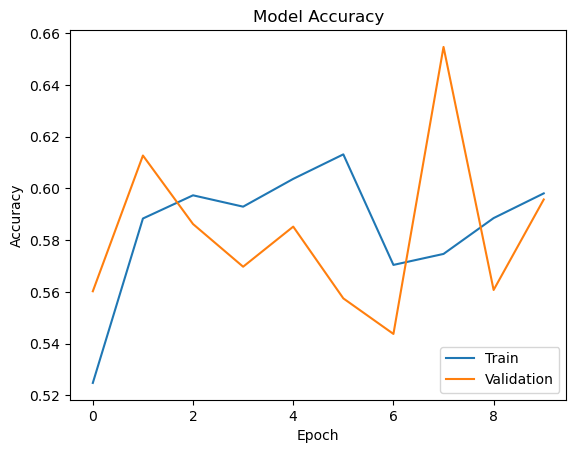

In [22]:
# Загрузка набора данных IMDb с разделением на обучающую, валидационную и тестовую части
dataset = load_dataset("jahjinx/IMDb_movie_reviews")

# Преобразование в pandas DataFrame
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# Преобразование данных
x_train = df_train['text'].values
y_train = df_train['label'].values
x_val = df_val['text'].values
y_val = df_val['label'].values
x_test = df_test['text'].values
y_test = df_test['label'].values

# Токенизация
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

# Определение vocab_size
vocab_size = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(x_train)
x_val = tokenizer.texts_to_sequences(x_val)
x_test = tokenizer.texts_to_sequences(x_test)

# Создание  последовательностей  фиксированной  длины
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Загружаем предобученные embeddings (например, GloVe)
embeddings_index = {}
with open('./embeddings/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Создаем матрицу embeddings
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Создание модели
model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False),
    SimpleRNN(256, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(128),
    Dense(1, activation='tanh')
])

# Компиляция модели
optimizer = RMSprop(learning_rate=0.001) # Используем RMSprop
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Добавлено early stopping


# Обучение модели
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

# Оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: {}'.format(accuracy))

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Using the latest cached version of the dataset since jahjinx/IMDb_movie_reviews couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Legion\.cache\huggingface\datasets\jahjinx___im_db_movie_reviews\default\0.0.0\ef30f6a046230c843d79822b928267efd9453d5b (last modified on Tue Nov  5 00:18:40 2024).


Epoch 1/10
563/563 [==============================] - 17s 27ms/step - loss: 0.5195 - accuracy: 0.7385 - val_loss: 0.3961 - val_accuracy: 0.8303
Epoch 2/10
563/563 [==============================] - 14s 26ms/step - loss: 0.3703 - accuracy: 0.8367 - val_loss: 0.3231 - val_accuracy: 0.8627
Epoch 3/10
563/563 [==============================] - 14s 26ms/step - loss: 0.3160 - accuracy: 0.8641 - val_loss: 0.3222 - val_accuracy: 0.8558
Epoch 4/10
563/563 [==============================] - 14s 26ms/step - loss: 0.2825 - accuracy: 0.8795 - val_loss: 0.3051 - val_accuracy: 0.8700
Epoch 5/10
563/563 [==============================] - 15s 26ms/step - loss: 0.2605 - accuracy: 0.8905 - val_loss: 0.2928 - val_accuracy: 0.8783
Epoch 6/10
563/563 [==============================] - 16s 28ms/step - loss: 0.2268 - accuracy: 0.9060 - val_loss: 0.2800 - val_accuracy: 0.8827
Epoch 7/10
563/563 [==============================] - 15s 28ms/step - loss: 0.1928 - accuracy: 0.9217 - val_loss: 0.3293 - val_accuracy:

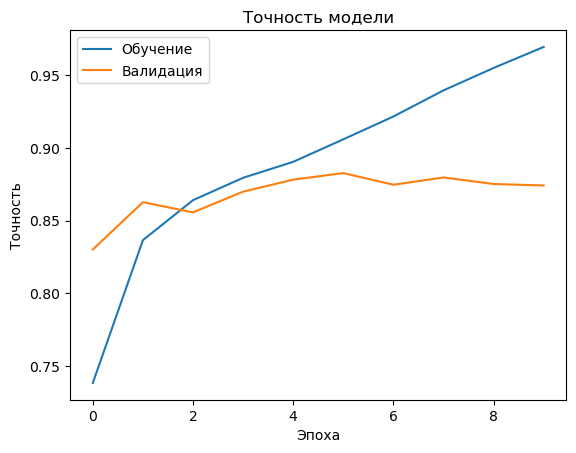

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from datasets import load_dataset
import os

# Загрузка данных IMDb с Hugging Face
dataset = load_dataset("jahjinx/IMDb_movie_reviews")

# Преобразуем в pandas DataFrame
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# Извлечение текстов и меток
x_train = df_train['text'].values
y_train = df_train['label'].values
x_val = df_val['text'].values
y_val = df_val['label'].values
x_test = df_test['text'].values
y_test = df_test['label'].values

# Преобразование x_train, x_val, и x_test в строки (если необходимо)
x_train = [str(x) for x in x_train]
x_val = [str(x) for x in x_val]
x_test = [str(x) for x in x_test]

# Токенизация
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

# Определение vocab_size
vocab_size = len(tokenizer.word_index) + 1

# Преобразование текстов в последовательности чисел
x_train = tokenizer.texts_to_sequences(x_train)
x_val = tokenizer.texts_to_sequences(x_val)
x_test = tokenizer.texts_to_sequences(x_test)

# Паддинг последовательностей до фиксированной длины
maxlen = 150
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Загрузка предобученных эмбеддингов GloVe
embeddings_index = {}
with open('./embeddings/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Создание матрицы эмбеддингов
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Создание модели
model = tf.keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    layers.LSTM(256, return_sequences=True),
    layers.LSTM(256),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Создание папки results, если она не существует
os.makedirs('results', exist_ok=True)

# Установка CSVLogger для записи данных обучения в .csv файл
csv_logger = CSVLogger('./results/training_log.csv', append=False)

# Установка EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, csv_logger]
)

# Оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Точность на тестовом наборе: {accuracy:.4f}')

# Визуализация точности обучения
plt.plot(history.history['accuracy'], label='Обучение')
plt.plot(history.history['val_accuracy'], label='Валидация')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='upper left')
plt.show()

# Сохранение модели
model.save("./results/imdb_train_model.h5")


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)

def predict_sentiment(review, model, tokenizer, maxlen):
  """Предсказывает sentiment (положительный или отрицательный) для данного отзыва.

  Args:
    review: Строка, содержащая текст отзыва.
    model: Обученная модель.
    tokenizer: Токенизатор, использованный для обучения модели.
    maxlen: Максимальная длина последовательности, используемая при обучении.

  Returns:
    Предсказанный sentiment (0 - отрицательный, 1 - положительный).
  """

  # Токенизация отзыва
  sequence = tokenizer.texts_to_sequences([review])

  # Padding последовательности
  padded_sequence = pad_sequences(sequence, maxlen=maxlen)

  # Предсказание sentiment
  prediction = model.predict(padded_sequence)

  # Преобразование вероятности в класс
  sentiment = 1 if prediction[0][0] > 0.5 else 0

  return sentiment

if __name__ == "__main__":
    maxlen = 150
    loaded_model = keras.models.load_model("./results/imdb_train_model.h5")

    new_review = "This is so bad"
    predicted_sentiment = predict_sentiment(new_review, loaded_model, tokenizer, maxlen)

    if predicted_sentiment == 1:
        print(new_review)
        print("Отзыв положительный")
    else:
        print(new_review)
        print("Отзыв отрицательный")

1/1 [==============================] - 0s 354ms/step
This is so bad
Отзыв отрицательный
